# Notebook
***
**Definition** <br>
spatial domain techniques are used to enhance the quality of an image by operating on the pixel values directly in the image plane. Spatial domain image enhancement techniques involve modifying the pixel values of an image by applying some mathematical operations to the pixels' intensity values. <br>

**Techniques** <br>
1. Brightness and Contrast Adjustment: Adjusting the brightness and contrast of an image is one of the most basic image enhancement techniques. It involves changing the pixel values to make the image brighter or darker and to increase or decrease the difference between the light and dark areas of the image.
2. Histogram Equalization: This technique redistributes the pixel values of an image to make the histogram of the image more evenly distributed. This can be used to enhance images that have a low contrast or are too dark or too bright.
3. Spatial Filtering: This technique involves applying a filter to the image to modify the pixel values. There are two types of filters: low-pass and high-pass filters. Low-pass filters smooth the image and reduce noise, while high-pass filters enhance edges and details.
4. Image Sharpening: This technique is used to enhance the edges of an image by applying a high-pass filter to the image.
5. Image Restoration: This technique is used to restore an image that has been degraded by noise or other factors. It involves applying filters to the image to remove noise and restore the image to its original state.

# Import Libraries
***
Python OpenCV can be used for image processing in Python Programming Language

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Metode

## Perbaikan Kontras dengan Fungsi Transformasi Intensitas
***
**Tujuan** <br>
1. Menghasilkan kontras gambar yang lebih baik

**Metode** <br>
- Transformasi Power-Law (Gamma)

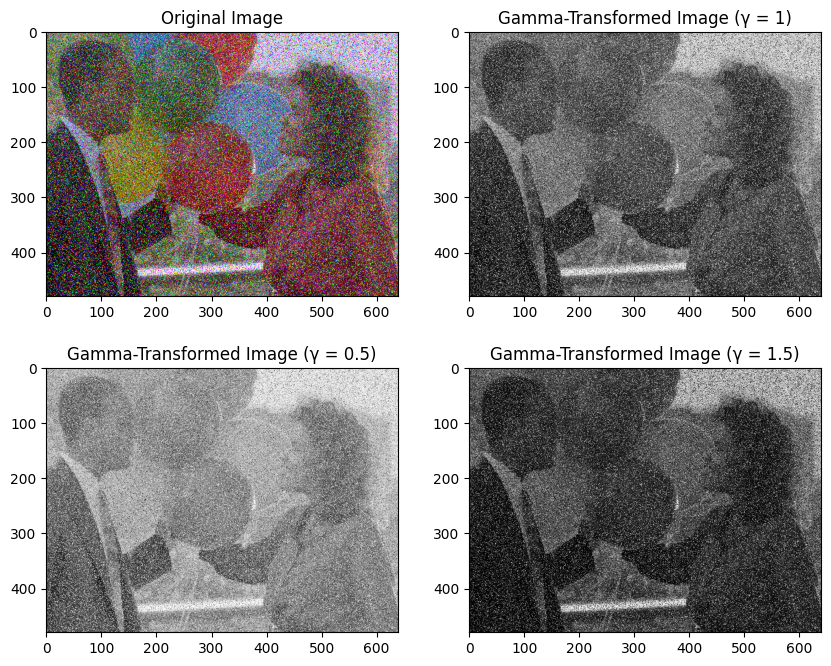

In [2]:
# Load the input image
img = cv2.imread('images/noisy_images/balloons_noisy.png')

# Convert the input image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the gamma value
gamma1 = 1
gamma2 = 0.5
gamma3 = 1.5

# Perform power-law gamma transformation
img_gamma1 = np.power(img_gray / 255.0, gamma1)
img_gamma1 = np.uint8(img_gamma1 * 255)

img_gamma2 = np.power(img_gray / 255.0, gamma2)
img_gamma2 = np.uint8(img_gamma2 * 255)

img_gamma3 = np.power(img_gray / 255.0, gamma3)
img_gamma3 = np.uint8(img_gamma3 * 255)

# Display the original and gamma-transformed images side by side
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title('Original Image')
axs[0,1].imshow(img_gamma1, cmap='gray')
axs[0,1].set_title('Gamma-Transformed Image (γ = 1)')
axs[1,0].imshow(img_gamma2, cmap='gray')
axs[1,0].set_title('Gamma-Transformed Image (γ = 0.5)')
axs[1,1].imshow(img_gamma3, cmap='gray')
axs[1,1].set_title('Gamma-Transformed Image (γ = 1.5)')
plt.show()


## Contrast Streching

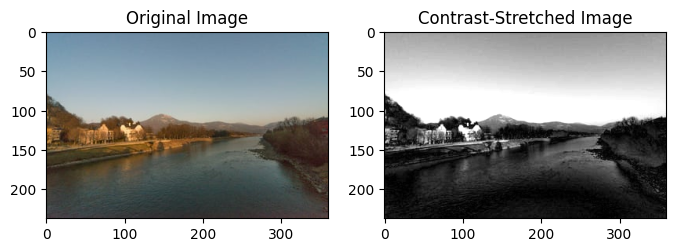

In [3]:
# Load the input image
img = cv2.imread('images/noisy_images/Example-image.jpg')

# Convert the input image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform contrast stretching
v_min, v_max = np.percentile(img_gray, (5, 95))
img_stretched = cv2.normalize(img_gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
img_stretched = cv2.convertScaleAbs(img_stretched, alpha=(255.0/(v_max-v_min)), beta=(-255.0*v_min)/(v_max-v_min))

# Display the original and contrast-stretched images side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(img_stretched, cmap='gray')
axs[1].set_title('Contrast-Stretched Image')
plt.show()


## Pemerataan Iluminasi (Histogram Equalization)

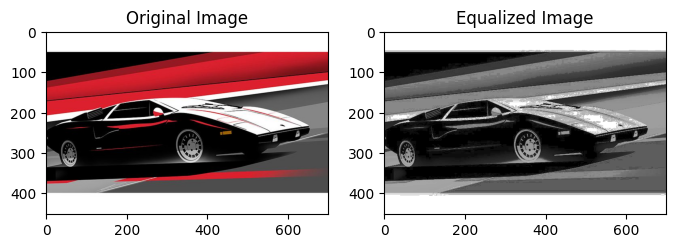

In [4]:
# Load the input image
img = cv2.imread('images/noisy_images/car_high_contrast.jpg')

# Convert the input image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
img_equalized = cv2.equalizeHist(img_gray)

# Display the original and contrast-stretched images side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(img_equalized, cmap='gray')
axs[1].set_title('Equalized Image')
plt.show()

## Filter spasial lowpass dan highpass

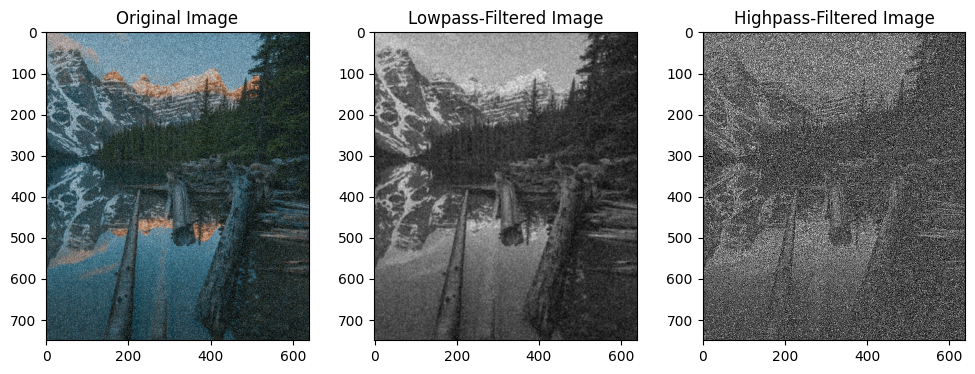

In [5]:
# Load the input image
img = cv2.imread('images/noisy_images/body-of-water-near-trees-with-noise.png')

# Convert the input image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the kernel size and type of the lowpass filter
ksize = 3
kernel = np.ones((ksize, ksize), np.float32) / (ksize ** 2)

# Apply the lowpass filter
img_lowpass = cv2.filter2D(img_gray, -1, kernel)

# Define the kernel size and type of the highpass filter
ksize = 3
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# Apply the highpass filter
img_highpass = cv2.filter2D(img_gray, -1, kernel)

# Display the original, lowpass-filtered, and highpass-filtered images side by side
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(img_lowpass, cmap='gray')
axs[1].set_title('Lowpass-Filtered Image')
axs[2].imshow(img_highpass, cmap='gray')
axs[2].set_title('Highpass-Filtered Image')
plt.show()


## Shading Correction

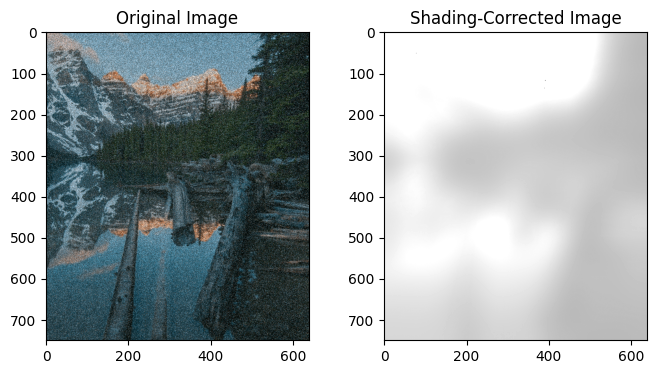

In [6]:
# Load the input image
img = cv2.imread('images/noisy_images/body-of-water-near-trees-with-noise.png')

# Convert the input image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the background illumination using a Gaussian blur
bg = cv2.GaussianBlur(img_gray, (201, 201), 0)

# Subtract the background illumination from the input image to obtain the shading component
shading = img_gray.astype(float) - bg.astype(float)

# Normalize the shading component to the range [0, 255]
shading = (shading - np.min(shading)) * (255 / (np.max(shading) - np.min(shading)))
shading = shading.astype(np.uint8)

# Apply shading correction to the input image
img_shading_corrected = cv2.add(img_gray, -shading)

# Display the original and shading-corrected images side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(img_shading_corrected, cmap='gray')
axs[1].set_title('Shading-Corrected Image')
plt.show()


## Median Filter

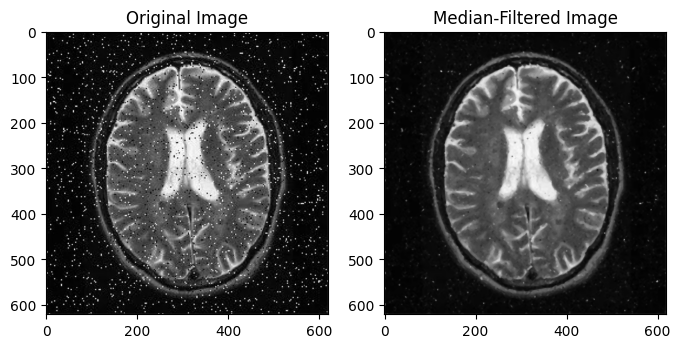

In [7]:
# Load the input image
img = cv2.imread('images/noisy_images/barin_noisy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply median filtering with a kernel size of 3x3
img_median_filtered = cv2.medianBlur(img, 5)

# Display the original and median-filtered images side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img_median_filtered, cmap='gray')
axs[1].set_title('Median-Filtered Image')
plt.show()


##  Sharpening using the First Derivative - The Gradient

Text(0.5, 1.0, 'Laplacian Image')

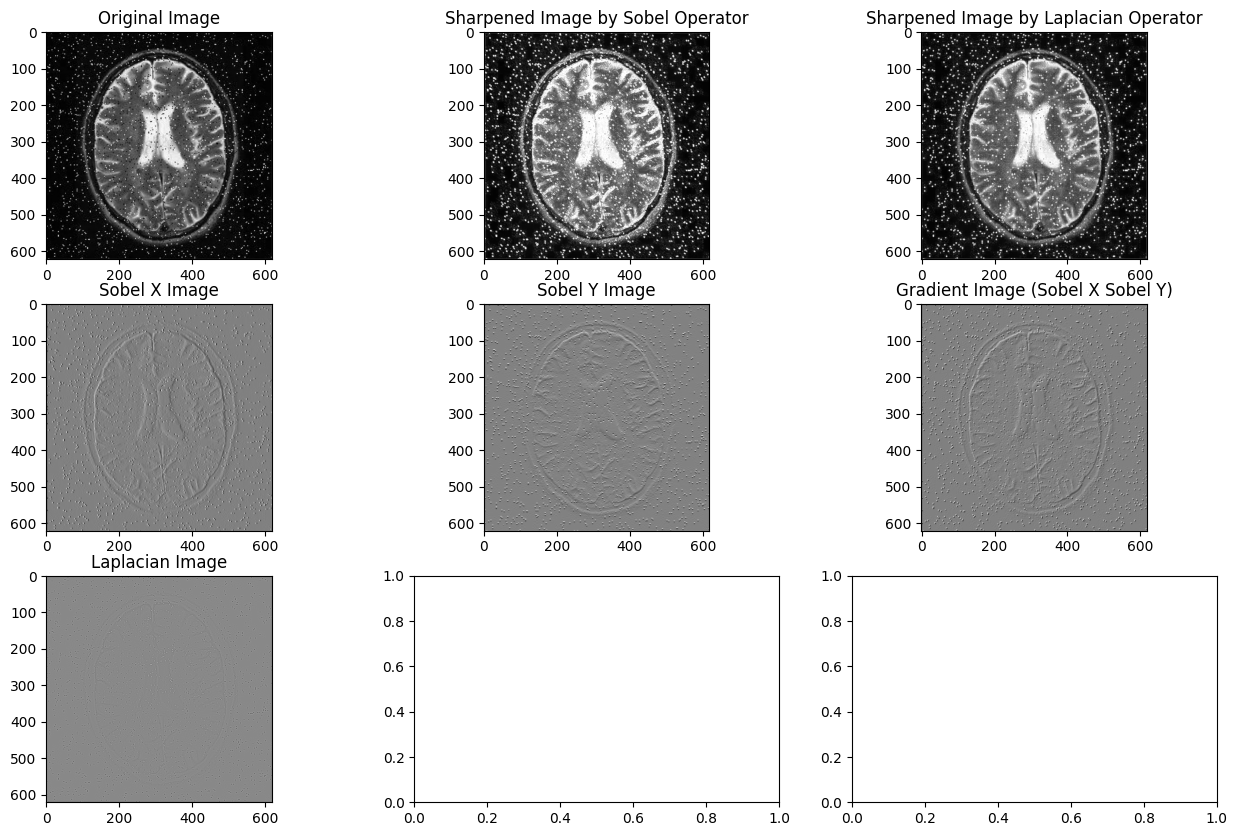

In [16]:
# Load the input image
img = cv2.imread('images/noisy_images/barin_noisy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filtering to the input image
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Add the Laplacian image to the original image to perform image sharpening
img_sharpened_lap = cv2.add(img, np.uint8(np.absolute(laplacian)))


"""
Sobel Operator
"""
# Compute the gradient of the input image using Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Add the gradient image to the original image to perform image sharpening
img_sharpened_sob = cv2.add(img, np.uint8(np.absolute(gradient)))

# Display the original and sharpened images side by side
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title('Original Image')
axs[0,1].imshow(img_sharpened_sob, cmap='gray')
axs[0,1].set_title('Sharpened Image by Sobel Operator')
axs[0,2].imshow(img_sharpened_lap, cmap='gray')
axs[0,2].set_title('Sharpened Image by Laplacian Operator')
axs[1,0].imshow(sobel_x, cmap='gray')
axs[1,0].set_title('Sobel X Image')
axs[1,1].imshow(sobel_y, cmap='gray')
axs[1,1].set_title('Sobel Y Image')
axs[1,2].imshow(gradient, cmap='gray')
axs[1,2].set_title('Gradient Image (Sobel X Sobel Y)')
axs[2,0].imshow(laplacian, cmap='gray')
axs[2,0].set_title('Laplacian Image')

## Metode Kombinasi Filter Spatial

# Python Codes!

## Load all your images

In [ ]:
images = os.listdir('images/noisy_images/')
n_images = len(images)
n_techniques = 4 # number of image enhancement tehcniques applied in this project

In [ ]:
images

In [ ]:
# Display the original and enhanced images side by side
fig, axs = plt.subplots(nrows=n_images, ncols=n_techniques, figsize=(16, 24))
for row in range(n_images):
    # Load the input image
    img = cv2.imread('images/noisy_images/' + images[row])

    for col in range(n_techniques):
        # Convert the input image to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Perform histogram equalization
        img_equalized = cv2.equalizeHist(img_gray)

        # Perform image sharpening
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        img_sharpened = cv2.filter2D(img_gray, -1, kernel)

        if col == 0:
            axs[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[row, col].set_title('Original Image')
        elif col == 1:
            axs[row, col].imshow(img_equalized, cmap='gray')
            axs[row, col].set_title('Equalized Image')
        elif col == 2:
            axs[row, col].imshow(img_sharpened, cmap='gray')
            axs[row, col].set_title('Sharpened Image')
        elif col == 3:
            img_negative = 255 - img_gray
            axs[row, col].imshow(img_negative, cmap='gray')
            axs[row, col].set_title('Negative Image')


# Adjust the spacing between the subplots and the figure edges
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,
                    top=0.8, hspace=0.8)

# Display the figure
plt.show()